## CRISP-DM
![CRISP-DM](../reports/figures/CRISP_DM.png)

### Forecasting with Facebook Prophet

In [25]:
# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

In [18]:
# Set custom style for mpl
plt.style.use("fivethirtyeight")

In [20]:
# Load samll dataset
df_small= pd.read_csv("../data/processed/COVID_flat_small.csv", sep=";")

In [21]:
# Extract Nigeria data
df_nig= df_small.loc[:,["date", "Nigeria"]]
# Cut off all leading zero values
df_nig= df_nig[df_nig["Nigeria"]>0]

In [22]:
df_nig.head()

,date,Nigeria
37,2020-02-28,1
38,2020-02-29,1
39,2020-03-01,1
40,2020-03-02,1
41,2020-03-03,1


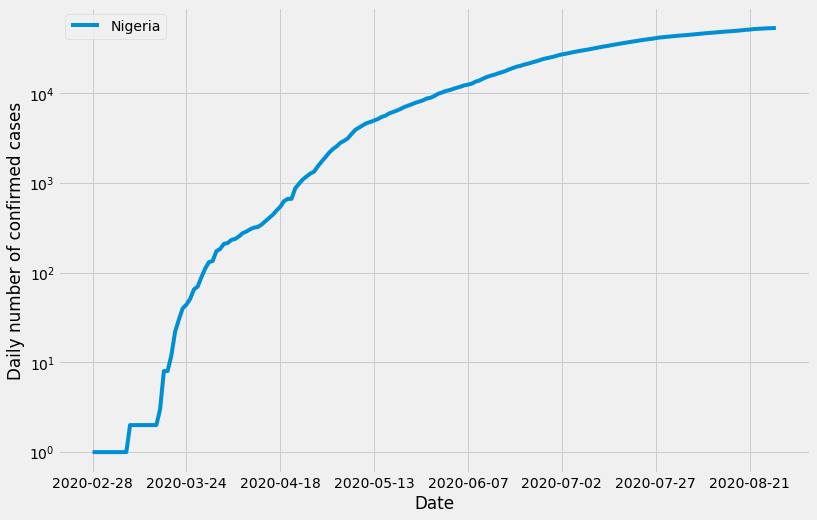

In [23]:
# Plot with date as index
ax= df_nig.set_index("date").plot(
    figsize=(12,8), logy=True
)
ax.set_ylabel("Daily number of confirmed cases")
ax.set_xlabel("Date")

plt.show()

In [31]:
# Create Model
my_model= Prophet(interval_width=0.95)

Facebook prophet accepts DataFrames with columns *ds* as Date and *y* as data to fit.

In [34]:
df_nig= df_nig.rename(columns={"date": "ds", "Nigeria": "y"})

In [35]:
# Fit model
my_model.fit(df_nig)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
# Appends specified number of future dates to date data
dates= my_model.make_future_dataframe(periods=10, freq='D')

In [42]:
dates.tail()

,ds
188,2020-09-03
189,2020-09-04
190,2020-09-05
191,2020-09-06
192,2020-09-07


In [43]:
# Make forecast
forecast= my_model.predict(dates)

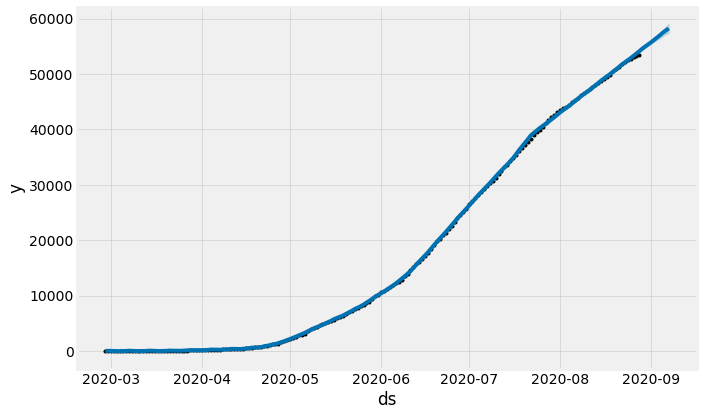

In [45]:
# Plot
# Use semicolon at end to suppress FBProphet internal plot
my_model.plot(
    forecast, uncertainty=True
);

In [46]:
# Render figure better
import plotly.offline as py
from fbprophet.plot import plot_plotly

fig= plot_plotly(my_model, forecast)

fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Daily confirmed cases of infected people"
)

fig.update_yaxes(type="log", range= [1.1, 5.5])
py.iplot(fig)

Closer look at output

In [50]:
forecast.sort_values(by="ds").head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-28,-20.193169,-297.400725,275.364191,-20.193169,-20.193169,0.056480,0.056480,0.056480,0.056480,0.056480,0.056480,0.0,0.0,0.0,-20.136689
1,2020-02-29,-18.204837,-254.002163,304.871196,-18.204837,-18.204837,49.098050,49.098050,49.098050,49.098050,49.098050,49.098050,0.0,0.0,0.0,30.893213
2,2020-03-01,-16.216505,-285.438975,278.893205,-16.216505,-16.216505,14.969340,14.969340,14.969340,14.969340,14.969340,14.969340,0.0,0.0,0.0,-1.247166
3,2020-03-02,-14.228174,-318.825493,304.591616,-14.228174,-14.228174,-0.744294,-0.744294,-0.744294,-0.744294,-0.744294,-0.744294,0.0,0.0,0.0,-14.972467
4,2020-03-03,-12.239842,-341.471792,269.246099,-12.239842,-12.239842,-32.893706,-32.893706,-32.893706,-32.893706,-32.893706,-32.893706,0.0,0.0,0.0,-45.133547


Plot components

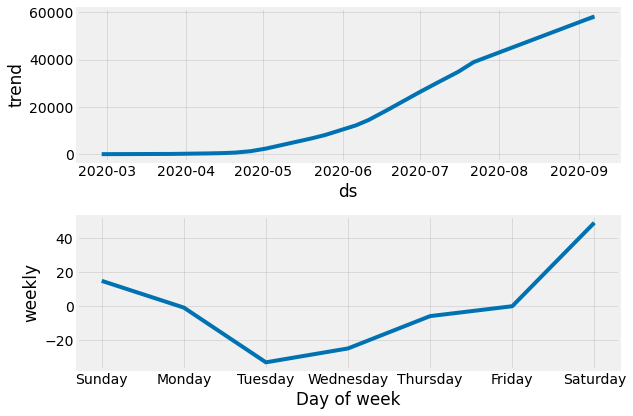

In [52]:
my_model.plot_components(forecast);

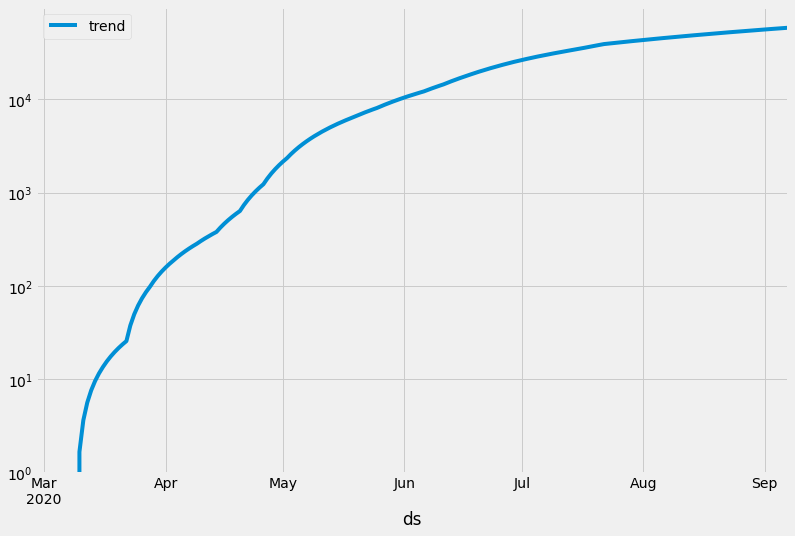

In [56]:
forecast[["ds", "trend"]].set_index("ds").plot(
    figsize=(12,8),
    logy=True
)